In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
df = pd.read_csv("coffee_sales.csv")

df["datetime"] = pd.to_datetime(df["datetime"])
df["hour_of_day"] = df["datetime"].dt.hour

# null and duplicate 
print("Null values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Null values:
 date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
hour_of_day     0
dtype: int64
Duplicate rows: 0


In [10]:
df[df["cash_type"] == "cash"]["card"].isnull().sum() #for cash transactions 

np.int64(89)

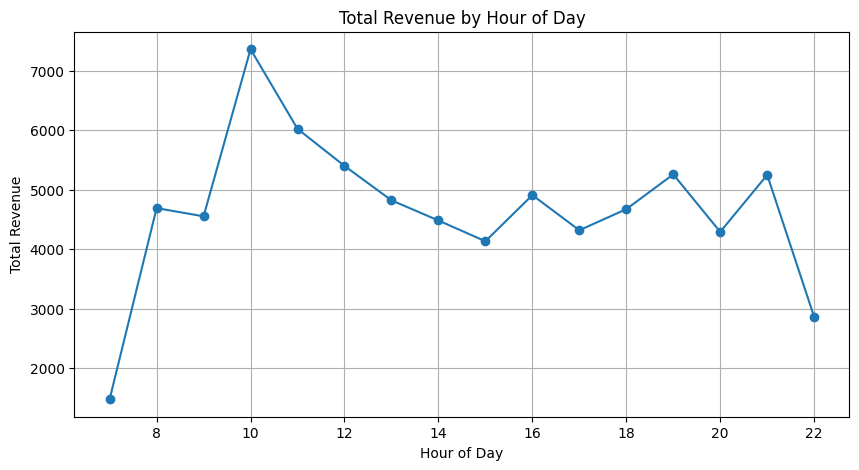

In [ ]:
hourly_revenue = df.groupby("hour_of_day")["money"].sum() 
# total revenue by hour

plt.figure(figsize=(10,5))
hourly_revenue.plot(marker="o")
plt.title("Total Revenue by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

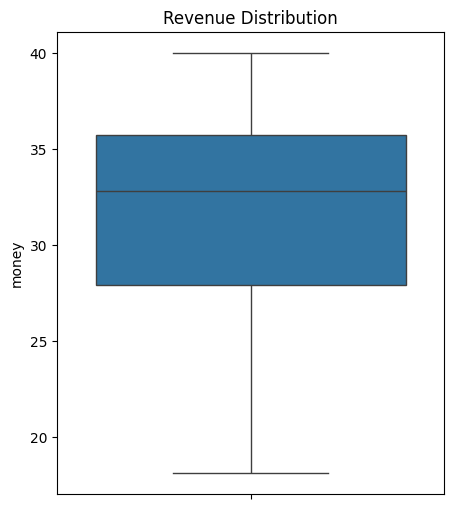

In [ ]:
plt.figure(figsize=(5,6))  # revenue distribution visualization
sns.boxplot(y=df["money"])
plt.title("Revenue Distribution")
plt.show()

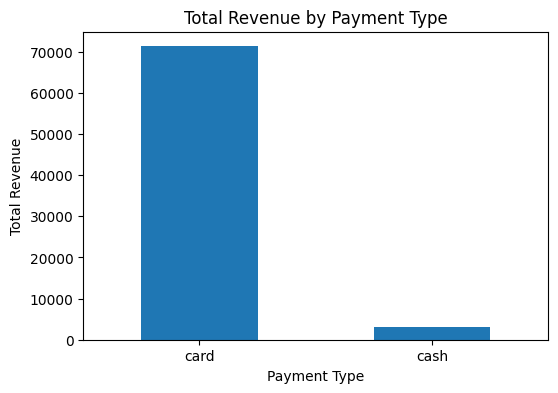

In [ ]:
payment_revenue = df.groupby("cash_type")["money"].sum()
# total revenue by payment type

plt.figure(figsize=(6,4))
payment_revenue.plot(kind="bar")
plt.title("Total Revenue by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

In [ ]:
payment_revenue = df.groupby("cash_type")["money"].sum()
# revenue share of cash and card payments

payment_percentage = (payment_revenue / payment_revenue.sum()) * 100

print("Revenue Contribution by Payment Type (%):")
print(payment_percentage.round(2))

Revenue Contribution by Payment Type (%):
cash_type
card    95.72
cash     4.28
Name: money, dtype: float64


In [ ]:
lowest_hour = hourly_revenue.idxmin() # finds minimum revenue hour
lowest_value = hourly_revenue.min()

print(f"Lowest Revenue Hour: {lowest_hour}")
print(f"Revenue at Lowest Hour: {lowest_value}")

Lowest Revenue Hour: 7
Revenue at Lowest Hour: 1477.82


In [ ]:
peak_hour = hourly_revenue.idxmax() # finds maximum revenue hour
peak_value = hourly_revenue.max()

print(f"Peak Revenue Hour: {peak_hour}")
print(f"Revenue at Peak Hour: {peak_value}")

Peak Revenue Hour: 10
Revenue at Peak Hour: 7359.4
